In [4]:
#import all libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mtplot
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from yellowbrick.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, make_scorer
import warnings
from sklearn.exceptions import ConvergenceWarning
#load dataset
dataset_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width','class']
df = pd.read_csv(dataset_link, names=column_names)

df = df.replace({"class":  {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})
df.head()

X=df.iloc[:,:-1]
y=df.iloc[:,4]
#divide to train and test split
x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=0.30)
#define soc formula for SVM 
def get_soc_svm(kernel,sp,p):
    if kernel=='rbf':
        return sp*(3*p+3)
    if kernel == 'linear':
        return sp*(2*p+1)
    if kernel == 'poly':
        return sp*(2*p+3+2)
    
    return sp*(2*p+12)

Min SOC:  117  corresponding gamma:  1e-05  and C:  1000.0  and SV:  13


[Text(0.5, 1.0, 'IRIS SVM SOC vs. accuracy')]

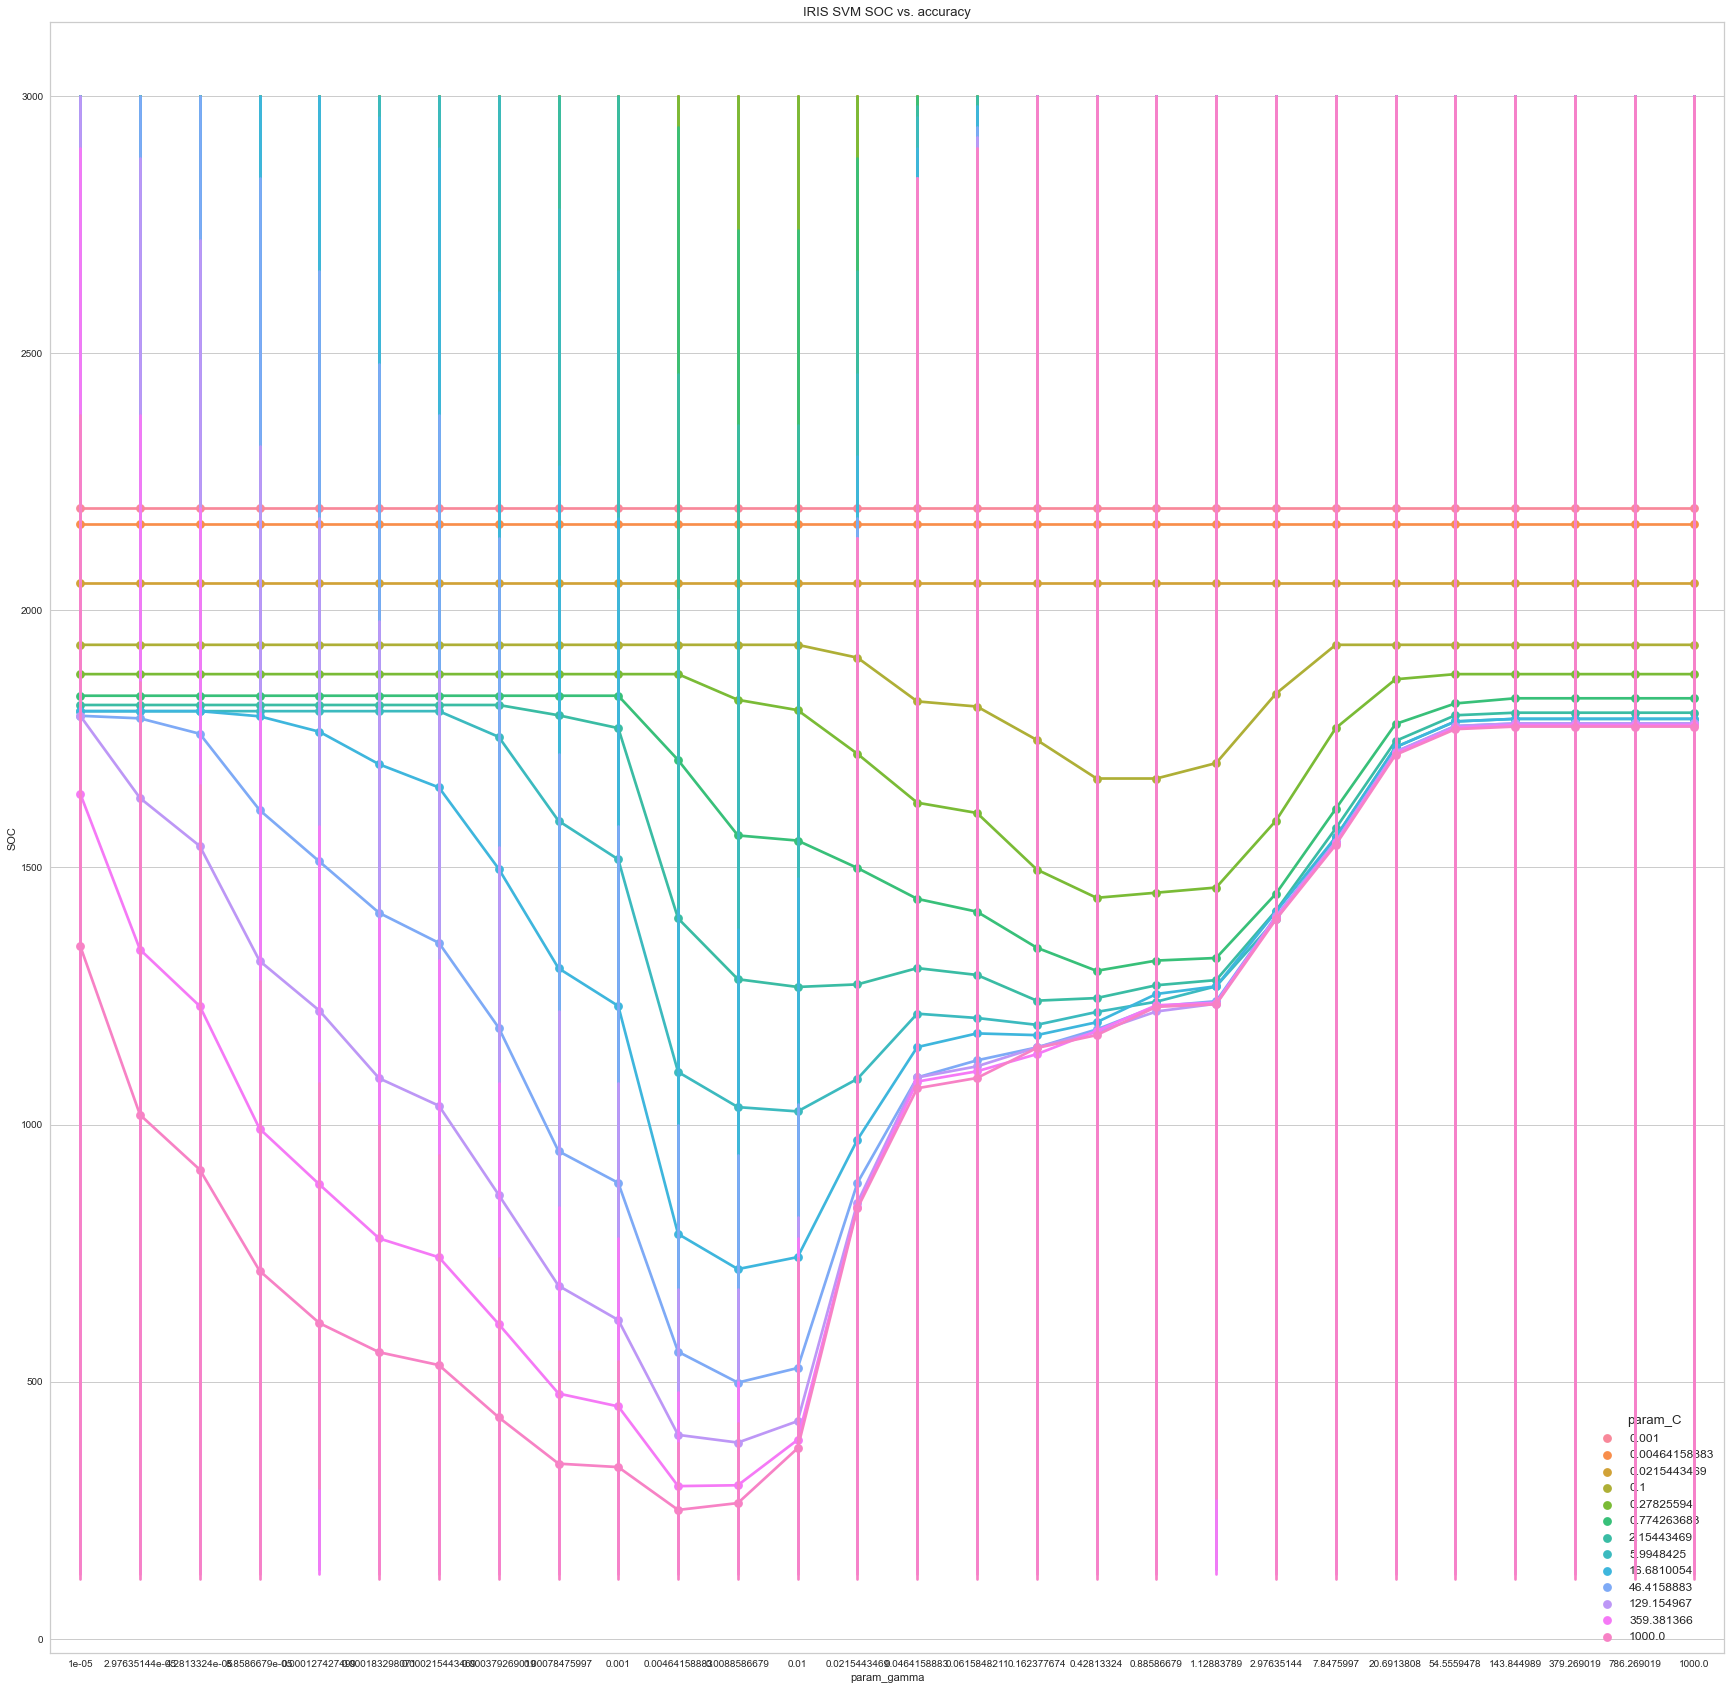

In [6]:
k=X.shape[1]

gammas = [ 1.00000000e-05, 2.97635144e-05, 4.28133240e-05, 8.85866790e-05,
           1.27427499e-04, 1.83298071e-04, 2.15443469e-04, 3.79269019e-04, 
           7.84759970e-04, 1.00000000e-03, 4.64158883e-03, 8.85866790e-03,
           1.00000000e-02, 2.15443469e-02, 4.64158883e-02, 6.15848211e-02, 
           1.62377674e-01, 4.28133240e-01, 8.85866790e-01, 1.12883789e+00, 
           2.97635144e+00, 7.84759970e+00, 2.06913808e+01, 5.45559478e+01, 
           1.43844989e+02, 3.79269019e+02, 7.86269019e+02, 1.00000000e+03]
cs=[1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01, 2.78255940e-01, 7.74263683e-01, 2.15443469e+00,
       5.99484250e+00, 1.66810054e+01, 4.64158883e+01, 1.29154967e+02,
       3.59381366e+02, 1.00000000e+03]
list_C=[]
list_gamma=[]
min_soc = 1000000
min_gamma=100000
min_c = 100000
socs = np.array([])
accuracies=np.array([])
colors=np.array([])
minAccuracy=0.001
rows_list = []
for C in cs:
    for gamma in gammas:
        for kernel_type in ['rbf','linear','sigmoid']:
            model = SVC(C=C,gamma=gamma,kernel=kernel_type)
            model.fit(X,y)
            soc = get_soc_svm(model.kernel,len(model.support_vectors_),k)
            if min_soc>soc:
                min_soc = soc
                min_soc_gamma=gamma
                min_soc_C = C
                min_soc_sp = len(model.support_vectors_)
            socs = np.append(socs,soc)
            accuracy = cross_val_score(model,X,y,cv=5,scoring='accuracy')
            accuracy=np.abs(np.mean(accuracy))
            accuracies = np.append(accuracies,accuracy)
            dics_val = {'SOC':soc, 'param_C': C, 'param_gamma':gamma}
            rows_list.append(dics_val)
df_res = pd.DataFrame(rows_list)
fig,ax = plt.subplots(figsize=(30,30))

sns.set(font_scale=1.1)

sns.pointplot(data=df_res[['SOC',
                           'param_C',
                           'param_gamma']],
             y='SOC',x='param_gamma',
             hue='param_C',ax=ax)
ax.set(title="IRIS SVM SOC vs. accuracy")


In [11]:
filtered_socs_with_accuracy = [[],[]] #[[socs],[accuracies]]
index_filtered=0
for i in range(len(socs)):
    if(socs[i] not in filtered_socs_with_accuracy[0]):
        filtered_socs_with_accuracy[0].append(socs[i])
        filtered_socs_with_accuracy[1].append(accuracies[i])
        index_filtered+=1
    else:
        for j in range(len(filtered_socs_with_accuracy[0])):
            if socs[i] == filtered_socs_with_accuracy[0][j]:
                if(accuracies[i] > filtered_socs_with_accuracy[1][j]):
                    filtered_socs_with_accuracy[1][j]=accuracies[i]
                    break
for j in range(len(filtered_socs_with_accuracy[0])):
        print(filtered_socs_with_accuracy[0][j],' : ',filtered_socs_with_accuracy[1][j])

2250.0  :  0.96
1350.0  :  0.9533333333333334
3000.0  :  0.9333333333333333
1251.0  :  0.9133333333333334
909.0  :  0.9333333333333333
549.0  :  0.9733333333333334
2175.0  :  0.9133333333333334
1920.0  :  0.9200000000000002
1890.0  :  0.9200000000000002
1695.0  :  0.9333333333333333
1470.0  :  0.96
1560.0  :  0.96
1965.0  :  0.9533333333333334
378.0  :  0.9800000000000001
2100.0  :  0.9133333333333334
2040.0  :  0.9266666666666667
1785.0  :  0.9133333333333334
1500.0  :  0.9466666666666667
1440.0  :  0.9533333333333334
1110.0  :  0.96
945.0  :  0.9666666666666668
975.0  :  0.9800000000000001
1005.0  :  0.9800000000000001
1395.0  :  0.9666666666666668
1935.0  :  0.9133333333333334
2220.0  :  0.9133333333333334
252.0  :  0.9866666666666667
2940.0  :  0.9333333333333333
2740.0  :  0.8400000000000001
1665.0  :  0.9133333333333334
1365.0  :  0.9533333333333334
2880.0  :  0.9066666666666668
1065.0  :  0.9533333333333334
990.0  :  0.9666666666666668
780.0  :  0.9800000000000001
645.0  :  0.98

min SOC:  117.0  corresponding accuracy:  0.9866666666666667
Min SOC:  117.0  corresponding gamma:  1e-05  and C:  1000.0  and SV:  13


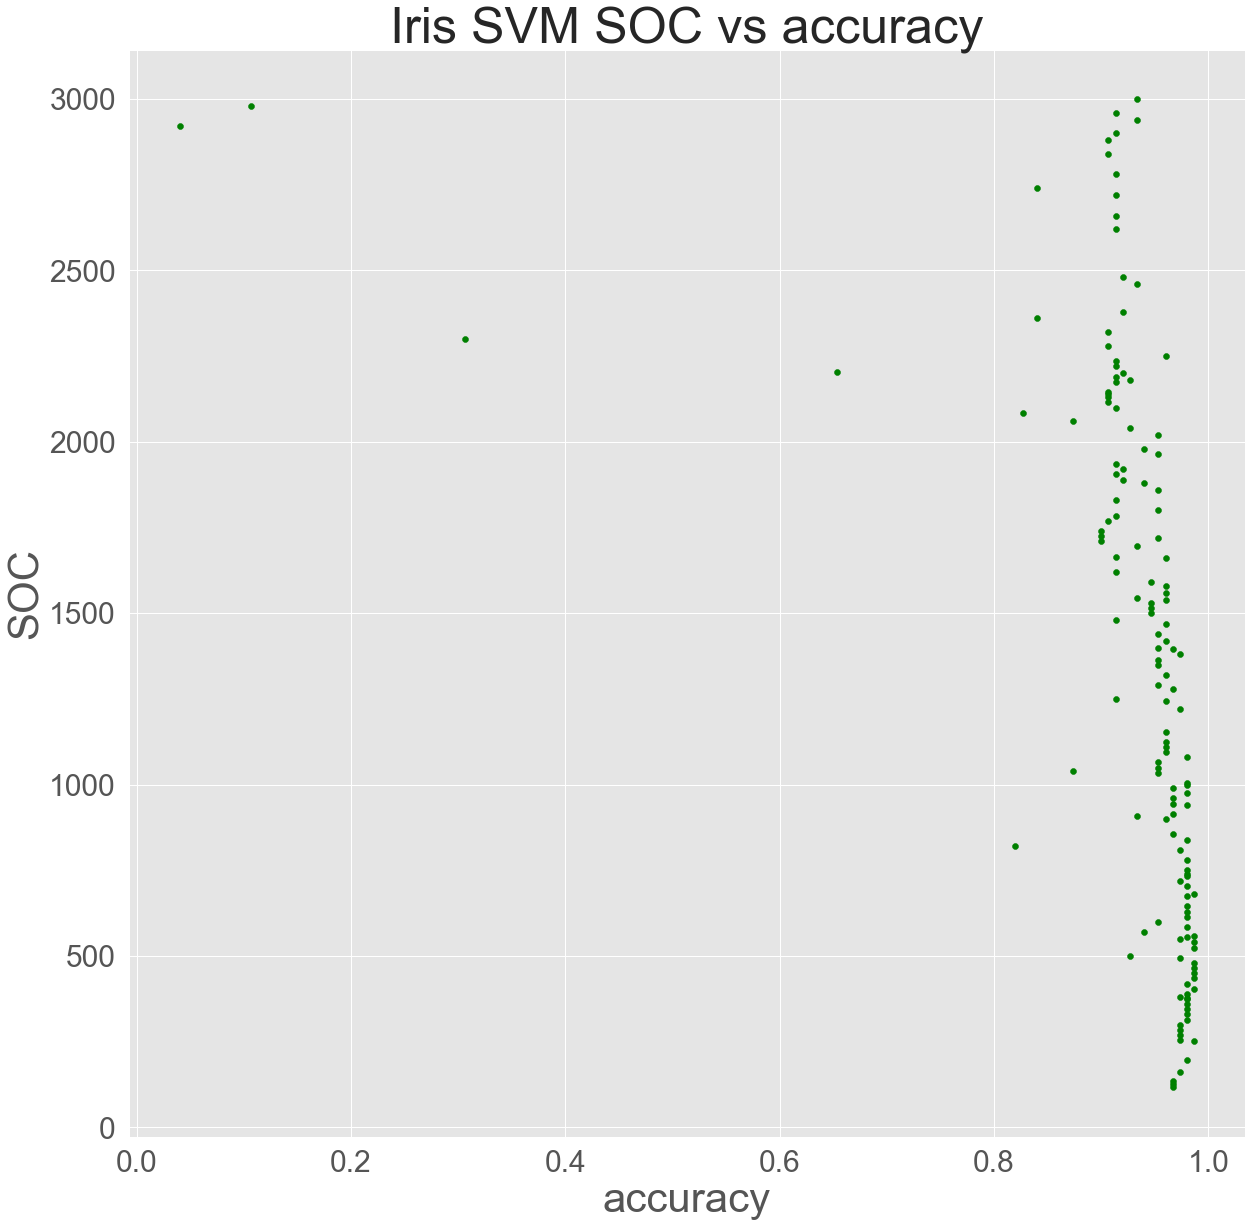

In [13]:

plt.figure(figsize=(20,20))
plt.title('Iris SVM SOC vs accuracy')
colors=np.append(colors,'green')
plt.scatter(filtered_socs_with_accuracy[1],filtered_socs_with_accuracy[0],c=colors)
plt.xlabel('accuracy')
plt.ylabel('SOC')
plt.style.use('ggplot')
max_acc = max(accuracies)
min_soc = min(socs)


plt.rcParams.update({'font.size': 35})
plt.rc('xtick', labelsize=30) 
plt.rc('ytick', labelsize=30) 
plt.show()